In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/hackathon/hackathon')

Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_csv('call data.csv')

In [6]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords and keep only alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return ' '.join(tokens)

In [7]:
df['processed_transcript'] = df['call_transcript'].apply(preprocess)

In [8]:
# Using TF-IDF to vectorize the transcripts (convert text to numerical format)
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['processed_transcript'])

In [29]:
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=9, random_state=42)

In [30]:
df['category'] = kmeans.labels_

In [31]:
cluster_labels = {0: 'Flight Information', 1: 'Booking and Reservations', 2: 'Baggage Enquiry', 3: 'Check-in and Boarding', 4: 'Flight Cancellations and Refunds', 5: 'Loyalty Programs', 6: 'Payment Issues', 7: 'Complaints and Feedback', 8: 'Other Issues'}
df['classified_issue'] = df['category'].map(cluster_labels)

In [32]:
for cluster in range(num_clusters):
    print(f"\nCluster {cluster} ({cluster_labels[cluster]})")
    cluster_text = df[df['category'] == cluster]['processed_transcript']
    all_words = ' '.join(cluster_text)
    word_freq = nltk.FreqDist(word_tokenize(all_words))
    print(word_freq.most_common(10))  # Print the 10 most common words in each cluster


Cluster 0 (Flight Information)
[('flight', 68959), ('agent', 65137), ('customer', 62388), ('let', 30895), ('help', 26580), ('check', 22477), ('time', 21004), ('like', 20861), ('next', 20647), ('calling', 19705)]

Cluster 1 (Booking and Reservations)
[('flight', 110774), ('agent', 82418), ('customer', 79355), ('change', 52498), ('let', 45152), ('would', 37252), ('help', 29383), ('like', 28067), ('day', 27693), ('thank', 26015)]

Cluster 2 (Baggage Enquiry)
[('flight', 36421), ('agent', 35798), ('customer', 34759), ('change', 28226), ('return', 22229), ('let', 19675), ('would', 13727), ('help', 13400), ('date', 13220), ('okay', 11553)]

Cluster 3 (Check-in and Boarding)
[('agent', 105145), ('customer', 103318), ('flight', 102659), ('change', 90702), ('let', 59287), ('fee', 41222), ('would', 40037), ('help', 39697), ('thank', 35458), ('need', 34311)]

Cluster 4 (Flight Cancellations and Refunds)
[('flight', 80478), ('agent', 65111), ('customer', 64418), ('let', 38272), ('change', 25738),

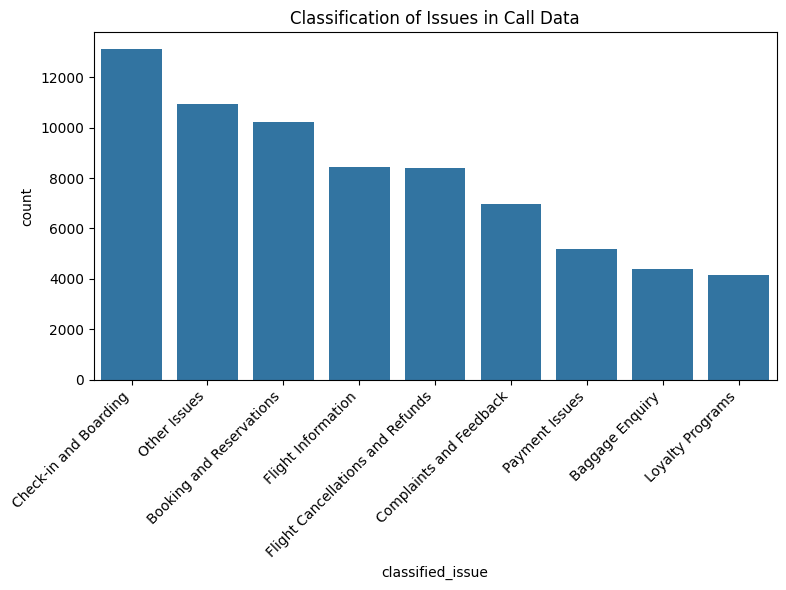

In [37]:
 #Visualize the classification of issues using Seaborn (optional)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='classified_issue', order=df['classified_issue'].value_counts().index)
plt.title('Classification of Issues in Call Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
df.to_csv('classified_call_issues.csv', index=False)